# <font color='#6629b2'>Random Number Generators: Uniform, Gaussian, and Multivariate Gaussian</font>
**Author**: Vincent Paul  
**Contact**: [vincentpaul.vin1990@gmail.com](mailto:vincentpaul.vin1990@gmail.com)  
**Date**: 08/16/2023  

### Description
This project demonstrates the implementation of Random Number Generators (RNGs) for:
- Uniform Distribution
- Gaussian Distribution
- Multivariate Gaussian Distribution

The notebook provides methods for generating random samples using these distributions and visualizes the generated samples through various plots such as histograms, 2D/3D scatter plots, pair plots, and heatmaps. These techniques are foundational for generating pseudo-random numbers for sampling and are widely used in simulations and machine learning.

### Tasks and Algorithms
1. **Uniform Distribution**: Implements RNG for generating uniformly distributed random numbers and visualizes them using histograms.
2. **Gaussian Distribution**: Implements RNG for Gaussian-distributed random numbers and visualizes them using histograms.
3. **Multivariate Gaussian Distribution**: Implements RNG for multivariate Gaussian distributions and visualizes results using scatter plots (2D and 3D), pair plots, and correlation heatmaps.

### Key Features
- **Exploratory Data Visualization**: Uses matplotlib and seaborn for histograms, scatter plots, pair plots, and heatmaps to explore distribution characteristics.
- **Interactive Analysis**: Integrates Python tools to explore random samples and validate distribution behavior.
- **Reproducibility**: Ensures the notebook is reusable and parameterized for generating random numbers across various distributions.

### Important Note
This project is based on publicly available datasets and implementations. The techniques and algorithms demonstrated reflect expertise in probability distributions and sampling but do not include any proprietary data or code. All sensitive and real-world data have been excluded to ensure confidentiality and compliance.

---


Implementation of Uniform, Gaussian and Multi-variate Gaussian distributions and sampling thru them to generate random numbers. Hence these implementations behave PRNGs for obtaining random sampling of points.

In [1]:
from urllib.request import url2pathname
import numpy as np
from matplotlib import pyplot as plt
from typing import List, Optional
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

COUNT=1000000

class RNG:

    @staticmethod
    def uniform(count: int) -> np.ndarray:
        return np.random.uniform(size=count)

    @staticmethod
    def gaussian(count: int,
                 mean: float = 0,
                 std_dev: float = 1) -> np.ndarray:
        ctr = count//2
        u1 = np.random.uniform(size=ctr)
        u2 = np.random.uniform(size=ctr)
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        samples = np.concatenate((z0, z1))
        return mean + std_dev * samples


    @staticmethod
    def mv_gaussian(mean_vec: List[float], cov_matrix: List[List[float]], count: int=5000) -> np.ndarray:
        mean_vec = np.array(mean_vec)
        cov_matrix = np.array(cov_matrix)

        eig_v, eig_vectors = np.linalg.eigh(cov_matrix)
        svd_matrix = eig_vectors @ np.diag(np.sqrt(eig_v))
        z_pts = RNG.gaussian(count * len(mean_vec), 0, 1).reshape(count, len(mean_vec))
        mv_pts = mean_vec + z_pts @ svd_matrix.T

        return mv_pts

In [2]:
RNG.uniform(20)

array([0.29717794, 0.35893321, 0.68194655, 0.77910645, 0.90835952,
       0.06400431, 0.00910281, 0.6995289 , 0.23805699, 0.99955776,
       0.17086636, 0.10419672, 0.70296411, 0.22260042, 0.78802096,
       0.97679554, 0.50303525, 0.84936219, 0.97646639, 0.20892462])

In [3]:
RNG.gaussian(20, 0.5, 0.5)

array([ 1.14825848,  0.56507358,  0.27857801,  0.17826206,  0.46045619,
        0.33744435,  0.20853213,  0.07125126,  0.75273444,  0.31890613,
       -0.1782037 ,  0.72512525,  0.35388589,  0.09885758,  0.91806052,
        0.90689105,  0.59809181,  0.21953503,  1.65181219,  0.54552169])

In [4]:
RNG.mv_gaussian([0, 0], [[1, 0], [0, 1]], 20)

array([[-3.17253638e-01, -1.36368867e+00],
       [ 1.55034059e-01,  4.37959145e-01],
       [-4.03043516e-01, -1.31283969e+00],
       [ 6.10743432e-01,  1.24604601e+00],
       [-1.76132645e-01,  1.32292047e+00],
       [-1.14790245e+00,  2.86543475e-01],
       [ 4.13664839e-01, -8.64137313e-02],
       [ 1.02177838e+00, -2.07700588e-01],
       [-4.47699520e-01, -1.05530908e-03],
       [-1.29005731e+00, -8.05888241e-01],
       [-4.27577814e-01, -9.36301977e-01],
       [ 5.04165656e-03, -1.25530197e+00],
       [ 6.75983835e-02, -2.10761867e-01],
       [ 4.56729653e-01,  7.94385670e-01],
       [-3.00384723e-01, -6.30246573e-01],
       [-9.02116306e-01,  1.65453924e-01],
       [-3.12862786e-01, -3.18164433e-01],
       [-5.10643397e-01, -1.52613155e+00],
       [-4.29210360e-01,  5.35276255e-01],
       [ 7.51660036e-01, -5.80730243e-01]])

##Plotting Functions

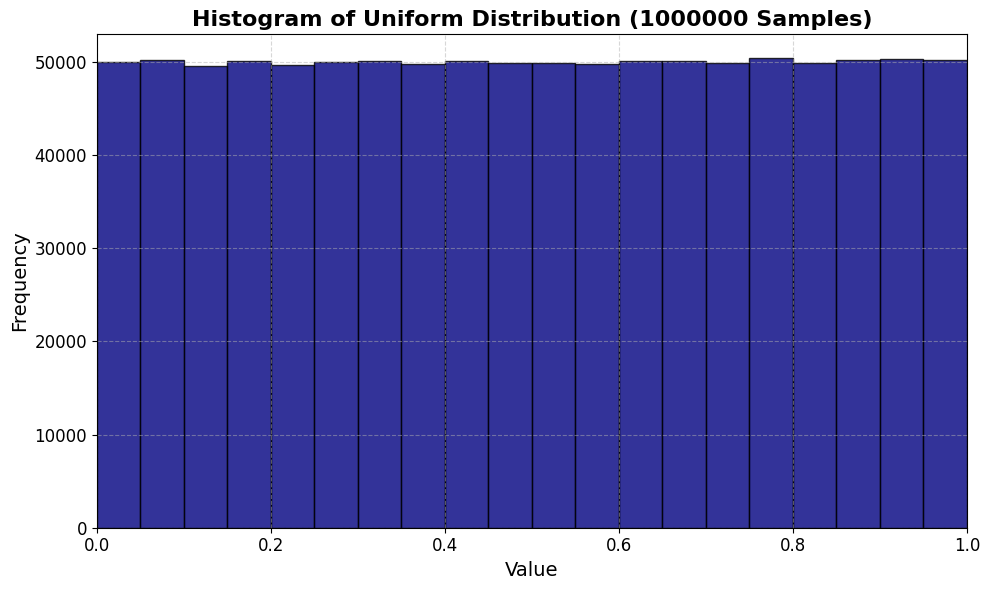

In [5]:
# Implements the histogram plot for Gaussian
def genUniformPlot(count:int=5000):
    samples = RNG.uniform(count)
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=20, color='navy', edgecolor='black', alpha=0.8)
    plt.title(f'Histogram of Uniform Distribution ({count} Samples)', fontsize=16, weight='bold')
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

genUniformPlot(COUNT)

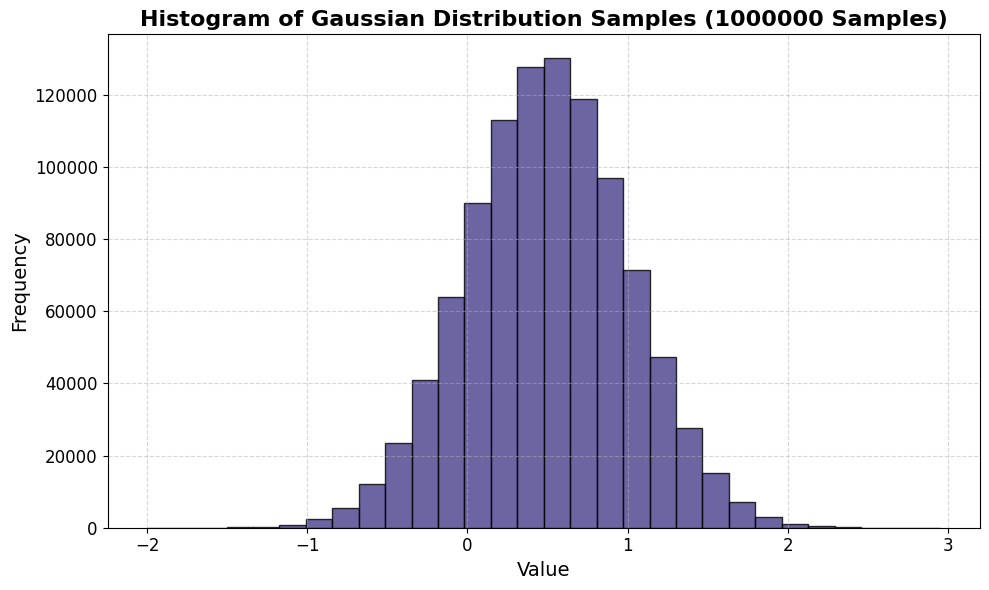

In [6]:
# Implements the histogram plot for Gaussian
def genGaussianPlot(count=5000, mean=0, std_dev=1):
    samples = RNG.gaussian(count, 0.5, 0.5)
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=30, color='darkslateblue', edgecolor='black', alpha=0.8)
    plt.title(f'Histogram of Gaussian Distribution Samples ({count} Samples)', fontsize=16, weight='bold')
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

genGaussianPlot(COUNT)

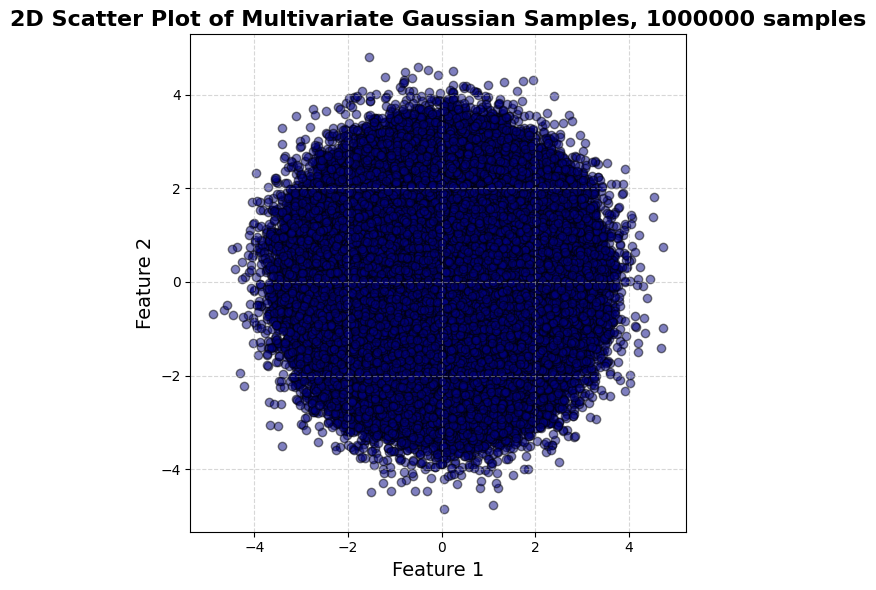

In [7]:
# Implements the 2D scatter plot for MV Gaussian
def genMVGaussianPlot_2d(samples: np.ndarray, count: int=1000):
    plt.figure(figsize=(10, 6))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, color='navy', edgecolor='black')
    plt.title(f'2D Scatter Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.gca().set_aspect('equal', adjustable='box')  # Enforce equal aspect ratio
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Generate 2D samples pts
mean_vector_2d = [0, 0]
cov_matrix_2d = [[1, 0], [0, 1]]
samples_2d = RNG.mv_gaussian(mean_vector_2d, cov_matrix_2d, count=COUNT)
genMVGaussianPlot_2d(samples_2d, COUNT)

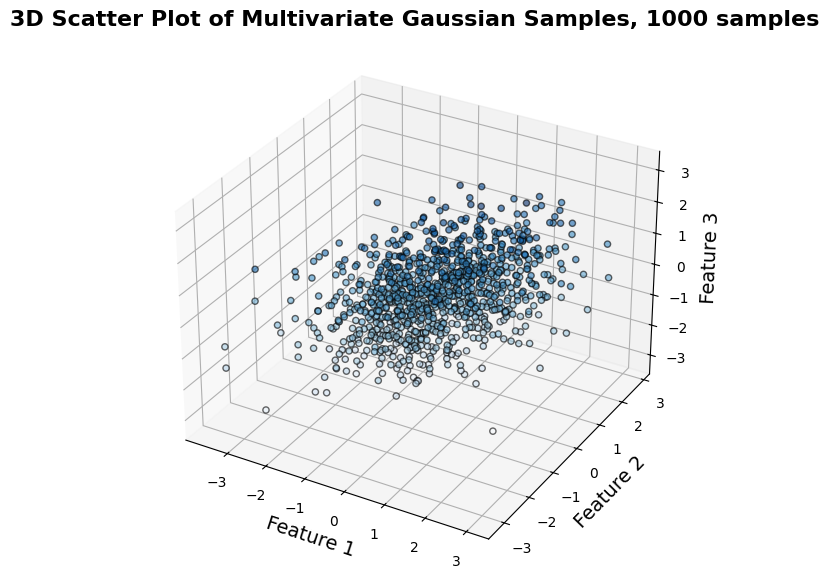

In [8]:
# Implements the 3D scatter plot for MV Gaussian
def genMVGaussianPlot_3d(samples: np.ndarray, count:int=1000):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Using a colormap for varying colors in blue shades
    scatter = ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2],
                         c=samples[:, 2], cmap='Blues', alpha=0.6, edgecolor='k')

    ax.set_title(f'3D Scatter Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    ax.set_xlabel('Feature 1', fontsize=14)
    ax.set_ylabel('Feature 2', fontsize=14)
    ax.set_zlabel('Feature 3', fontsize=14)
    plt.show()

# Generate 3D samples pts
mean_vector_3d = [0, 0, 0]
cov_matrix_3d = [[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]]
samples_3d = RNG.mv_gaussian(mean_vector_3d, cov_matrix_3d, count=1000)
genMVGaussianPlot_3d(samples_3d)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

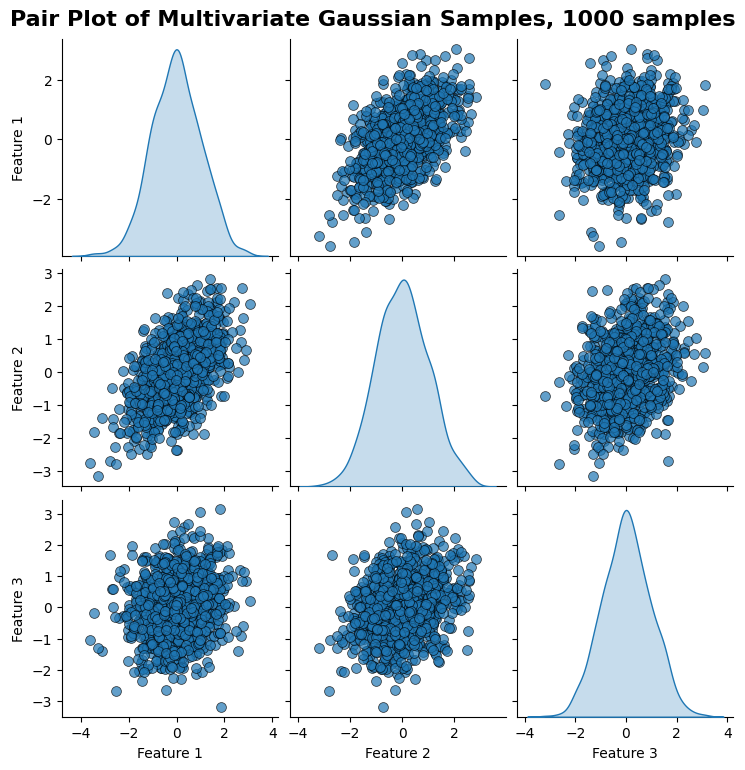

In [9]:
def genPairPlot(samples: np.ndarray, count:int=1000):
    df = pd.DataFrame(samples, columns=['Feature 1', 'Feature 2', 'Feature 3'])
    sns.pairplot(df, diag_kind='kde', palette='Blues', plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'k'})
    plt.suptitle(f'Pair Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold', y=1.02)
    plt.show()

genPairPlot(samples_3d)

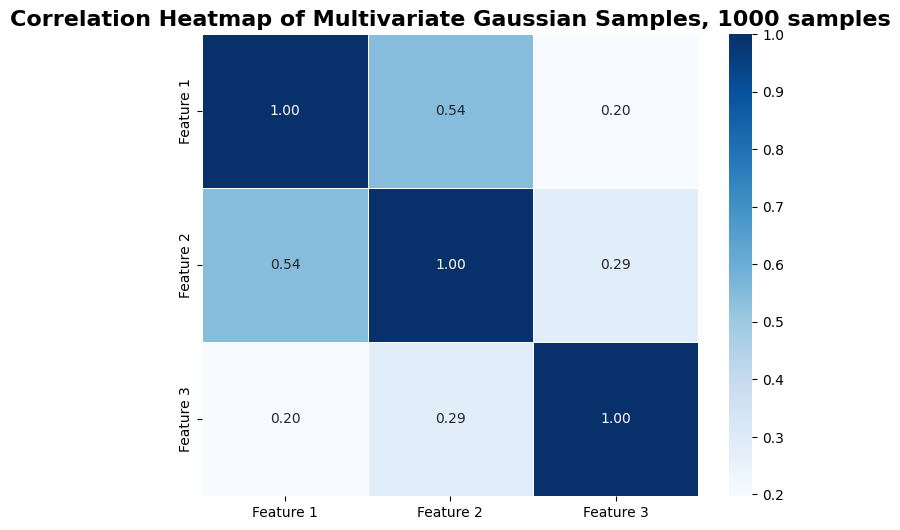

In [10]:
# Implements the plotting of heatmap for correlation of different features
def genHeatmap_MV(samples: np.ndarray, count:int=1500):
    df = pd.DataFrame(samples, columns=['Feature 1', 'Feature 2', 'Feature 3'])
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Heatmap of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    plt.show()

genHeatmap_MV(samples_3d, 1000)

In [11]:
# End of Assignment